In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-performance/StudentsPerformance.csv


In [2]:
df = pd.read_csv("/kaggle/input/student-performance/StudentsPerformance.csv")

df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

No null values

In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
df.rename(columns = {'writing score':'writing_score'},inplace = True)
df.rename(columns = {'reading score':'reading_score'},inplace = True)
df.rename(columns = {'math score':'math_score'},inplace = True)
df.rename(columns = {'test preparation course':'test_preparation_course'},inplace = True)
df.rename(columns = {'parental level of education':'parental_level_of_education'},inplace = True)
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


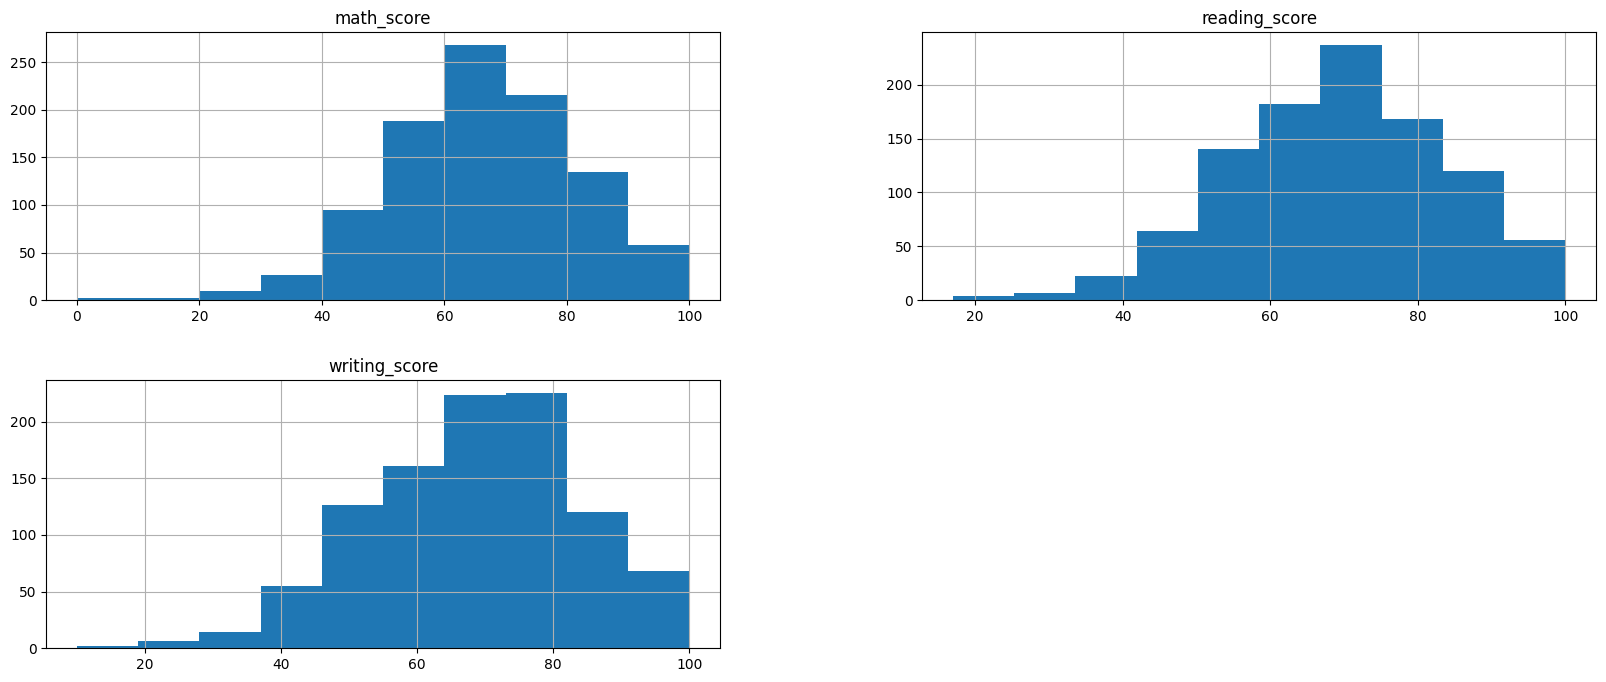

In [7]:
df.hist(figsize = (20,8));

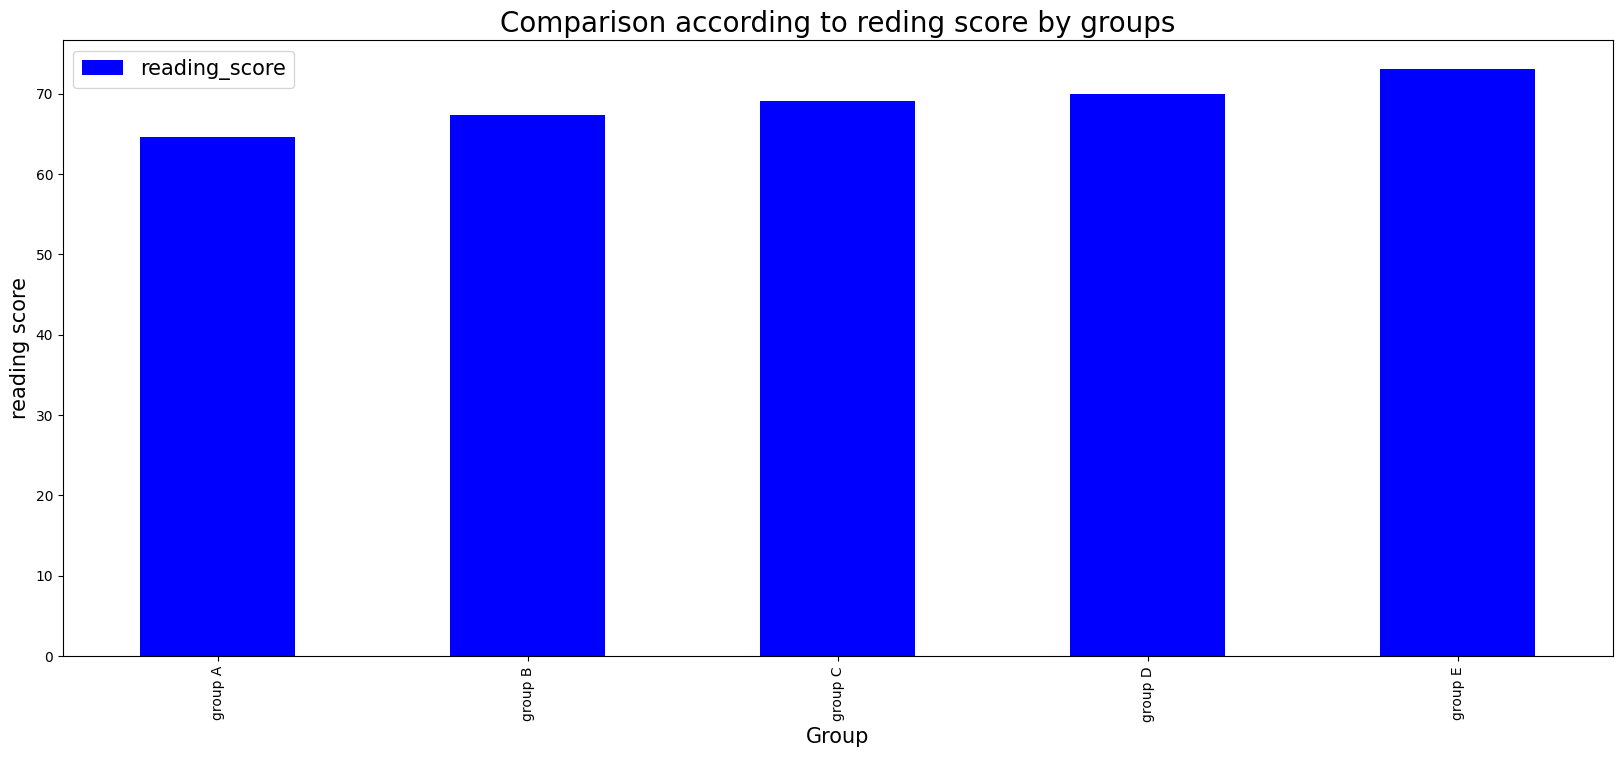

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=[20,8])

df.groupby(['race/ethnicity'])['reading_score'].mean().plot(kind = 'bar' , color = 'blue')

plt.legend(fontsize = 15);

plt.title("Comparison according to reding score by groups",fontdict={'size':'20'});

plt.xlabel('Group',fontdict={'size':'15'});

plt.ylabel('reading score',fontdict={'size':'15'});

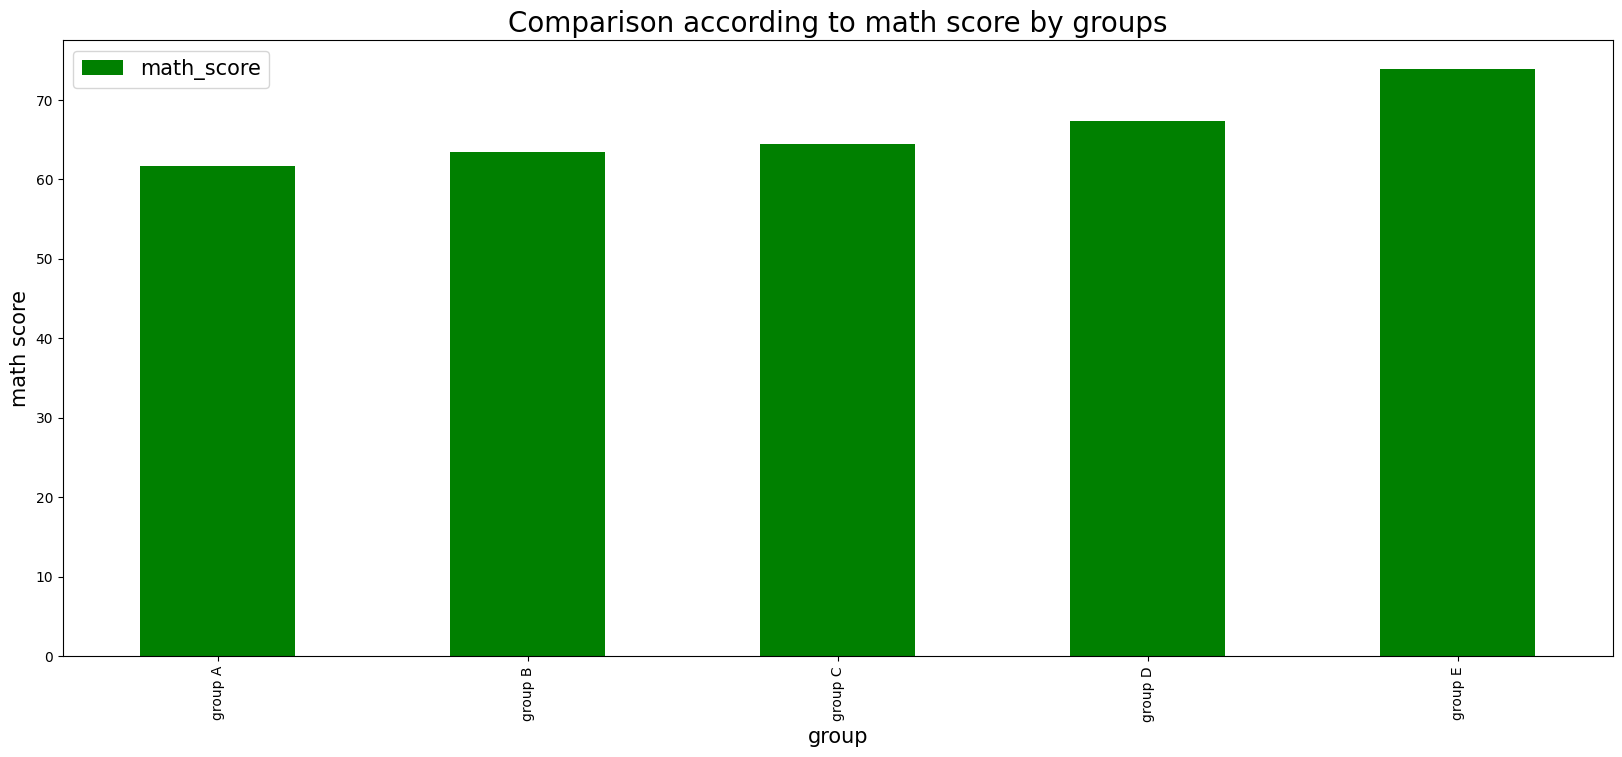

In [9]:
plt.figure(figsize=[20,8])
df.groupby(['race/ethnicity'])['math_score'].mean().plot(kind = 'bar' , color = 'green')
plt.legend(fontsize = 15);

plt.title("Comparison according to math score by groups",fontdict={'size':'20'});

plt.xlabel('group',fontdict={'size':'15'});

plt.ylabel('math score',fontdict={'size':'15'});

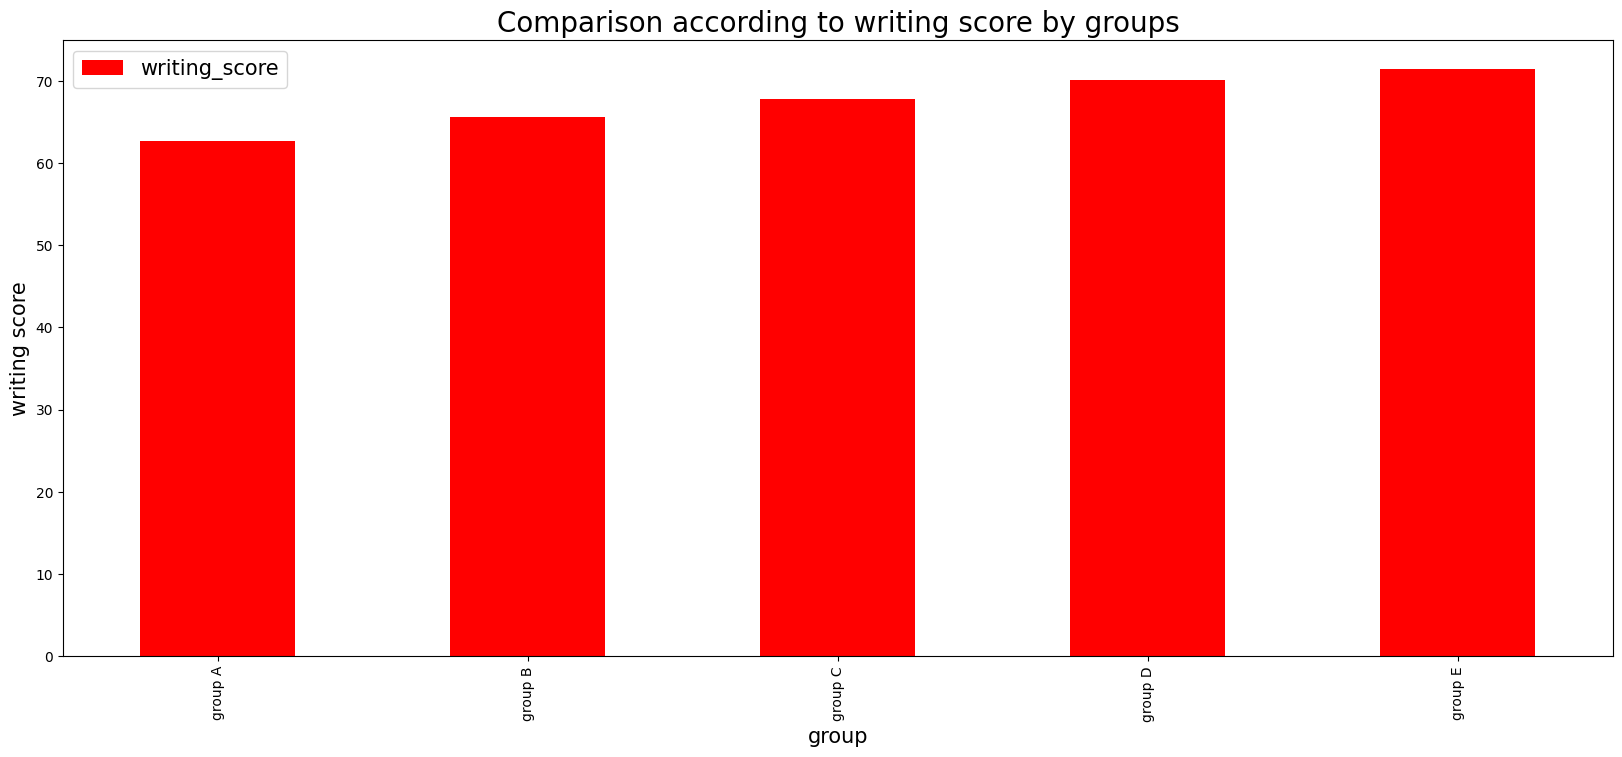

In [10]:
plt.figure(figsize=[20,8])
df.groupby(['race/ethnicity'])['writing_score'].mean().plot(kind = 'bar' , color = 'red')
plt.legend(fontsize = 15);

plt.title("Comparison according to writing score by groups",fontdict={'size':'20'});

plt.xlabel('group',fontdict={'size':'15'});

plt.ylabel('writing score',fontdict={'size':'15'});

In [11]:
df["total_score"] = ((df['math_score'] + df['reading_score'] + df['writing_score'])/300)* 100
df

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


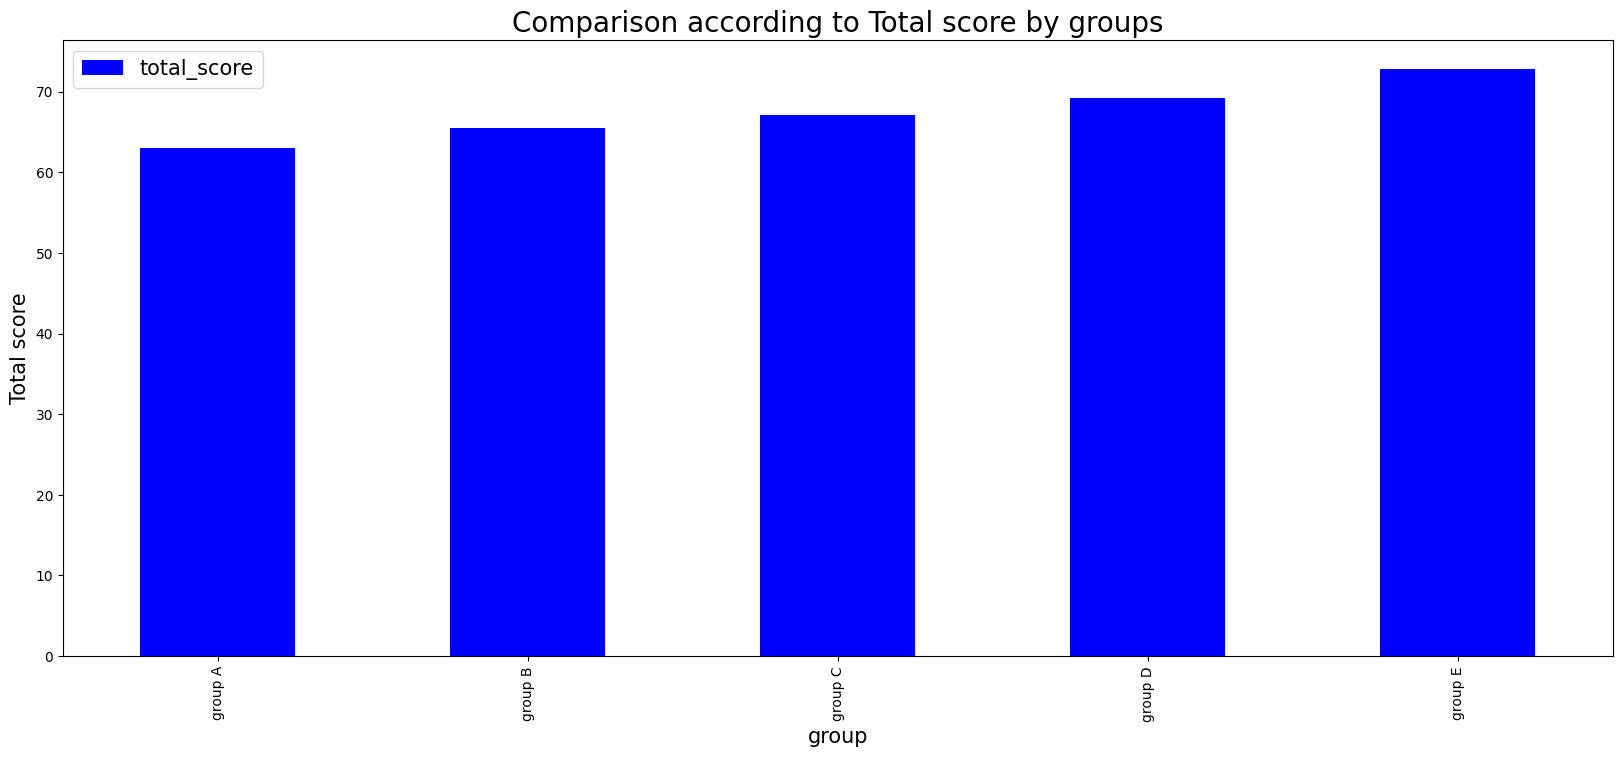

In [12]:
plt.figure(figsize=[20,8])
df.groupby(['race/ethnicity'])['total_score'].mean().plot(kind = 'bar' , color = 'blue')
plt.legend(fontsize = 15);

plt.title("Comparison according to Total score by groups",fontdict={'size':'20'});

plt.xlabel('group',fontdict={'size':'15'});

plt.ylabel('Total score',fontdict={'size':'15'});

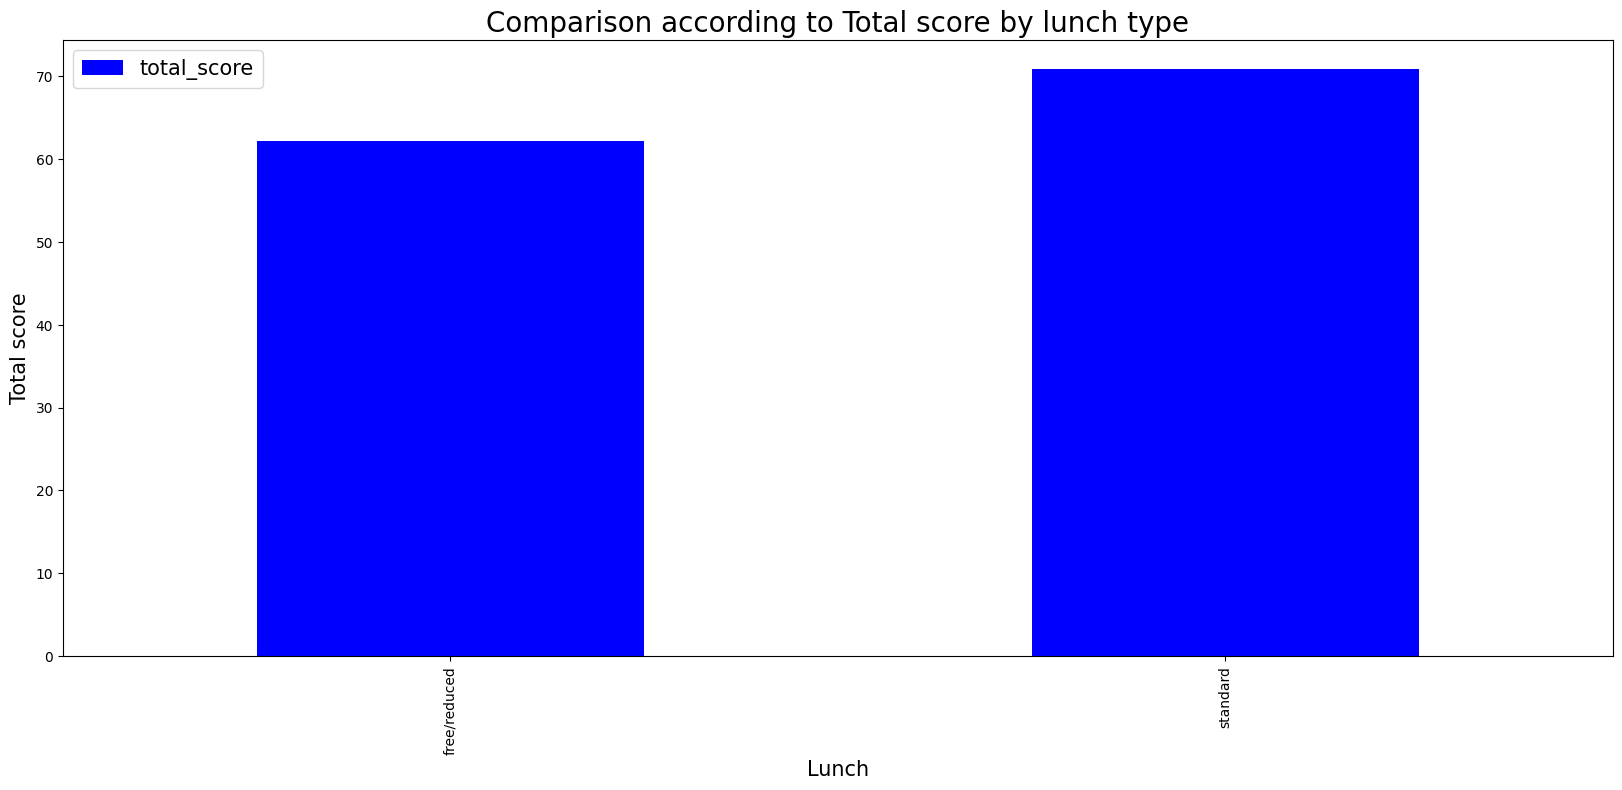

In [13]:
plt.figure(figsize=[20,8])
df.groupby(['lunch'])['total_score'].mean().plot(kind = 'bar' , color = 'blue')
plt.legend(fontsize = 15);

plt.title("Comparison according to Total score by lunch type",fontdict={'size':'20'});

plt.xlabel('Lunch',fontdict={'size':'15'});

plt.ylabel('Total score',fontdict={'size':'15'});

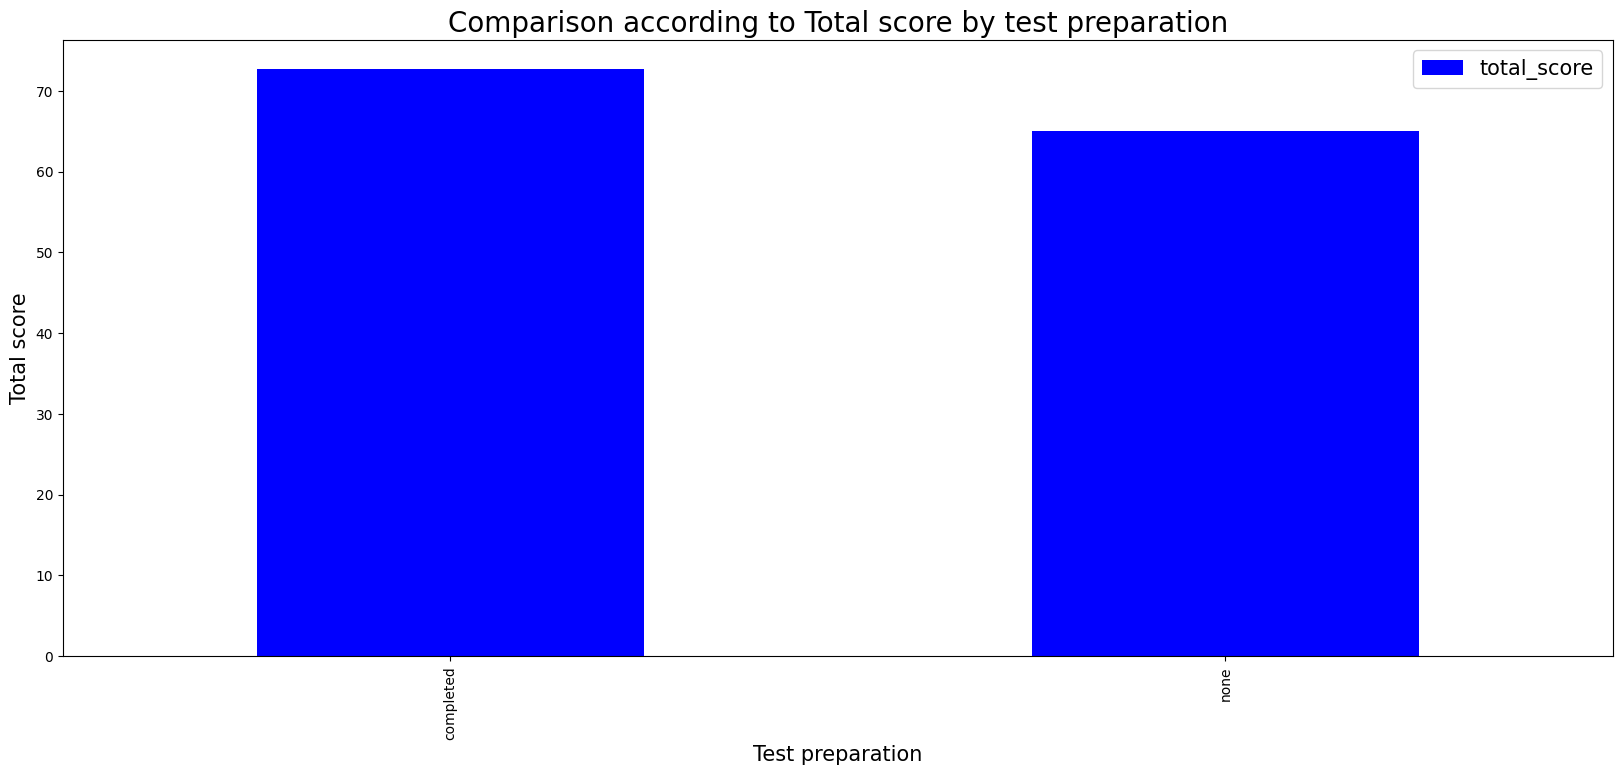

In [14]:
plt.figure(figsize=[20,8])
df.groupby(['test_preparation_course'])['total_score'].mean().plot(kind = 'bar' , color = 'blue')
plt.legend(fontsize = 15);

plt.title("Comparison according to Total score by test preparation",fontdict={'size':'20'});

plt.xlabel('Test preparation',fontdict={'size':'15'});

plt.ylabel('Total score',fontdict={'size':'15'});

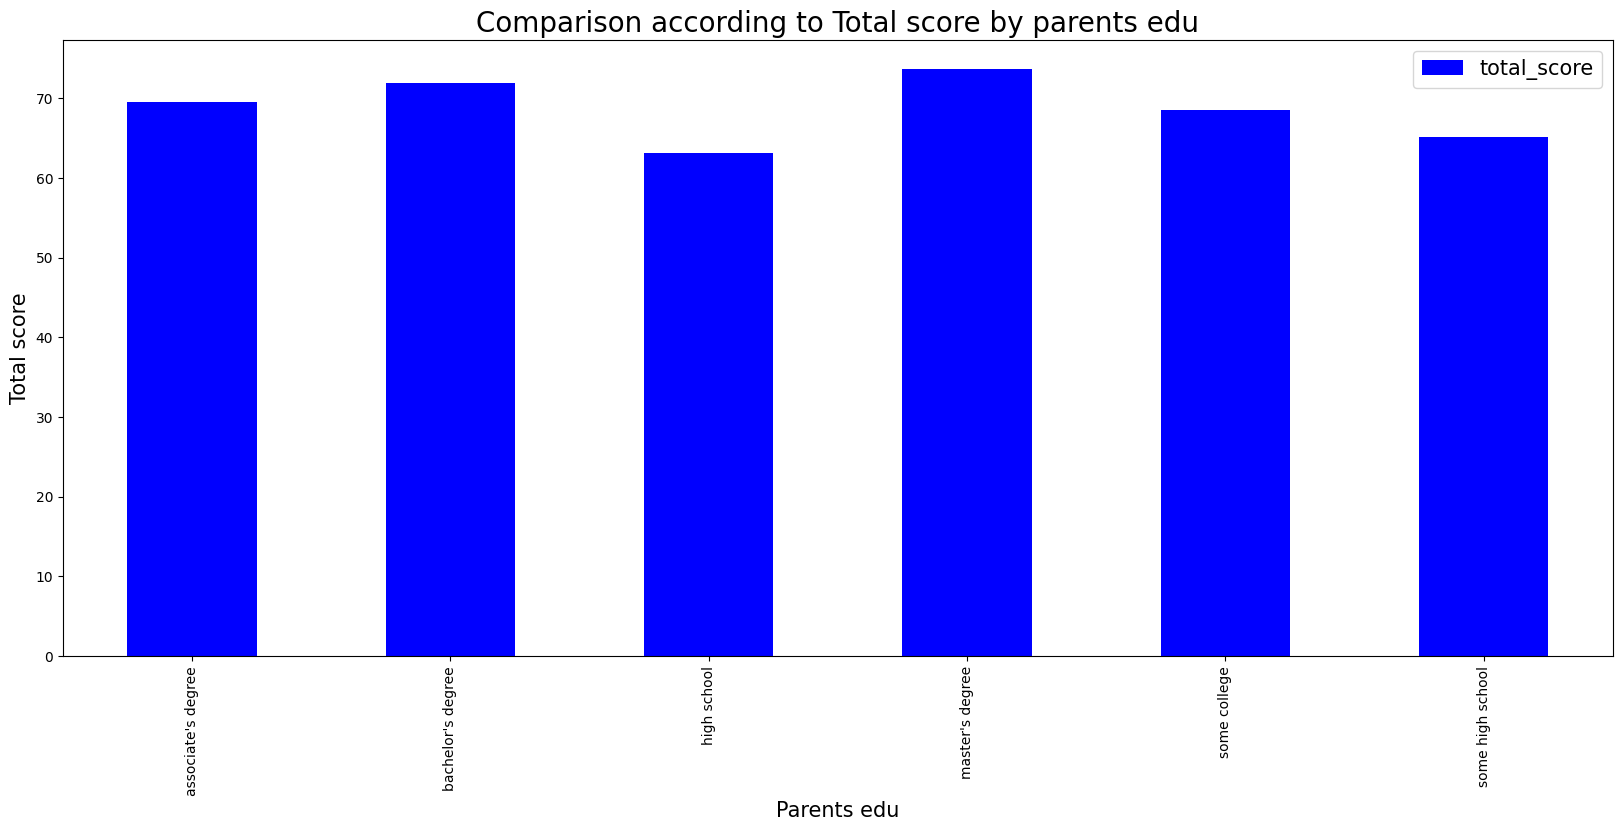

In [15]:
plt.figure(figsize=[20,8])
df.groupby(['parental_level_of_education'])['total_score'].mean().plot(kind = 'bar' , color = 'blue')
plt.legend(fontsize = 15);

plt.title("Comparison according to Total score by parents edu",fontdict={'size':'20'});

plt.xlabel('Parents edu',fontdict={'size':'15'});

plt.ylabel('Total score',fontdict={'size':'15'});

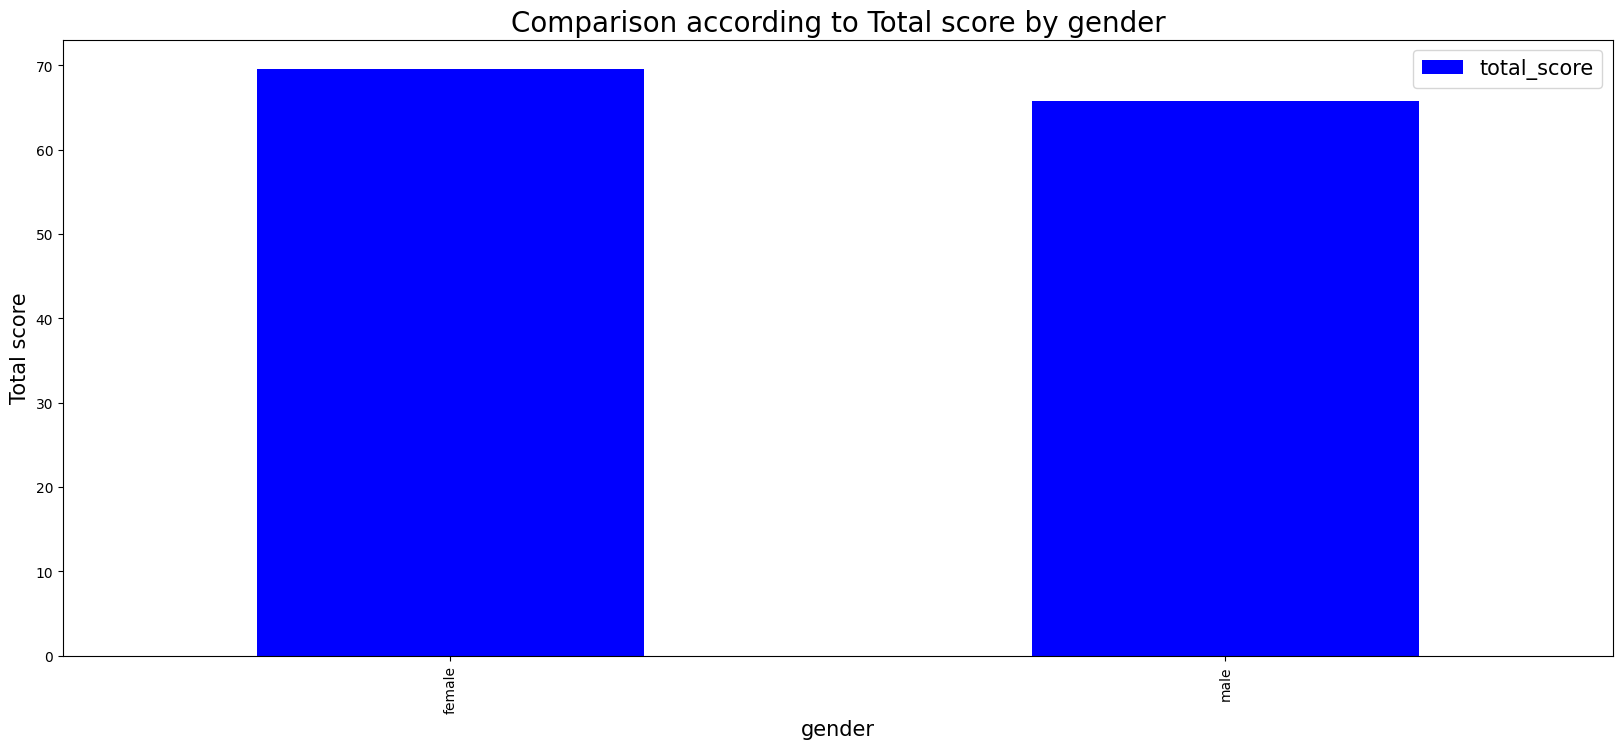

In [16]:
plt.figure(figsize=[20,8])
df.groupby(['gender'])['total_score'].mean().plot(kind = 'bar' , color = 'blue')
plt.legend(fontsize = 15);

plt.title("Comparison according to Total score by gender",fontdict={'size':'20'});

plt.xlabel('gender',fontdict={'size':'15'});

plt.ylabel('Total score',fontdict={'size':'15'});

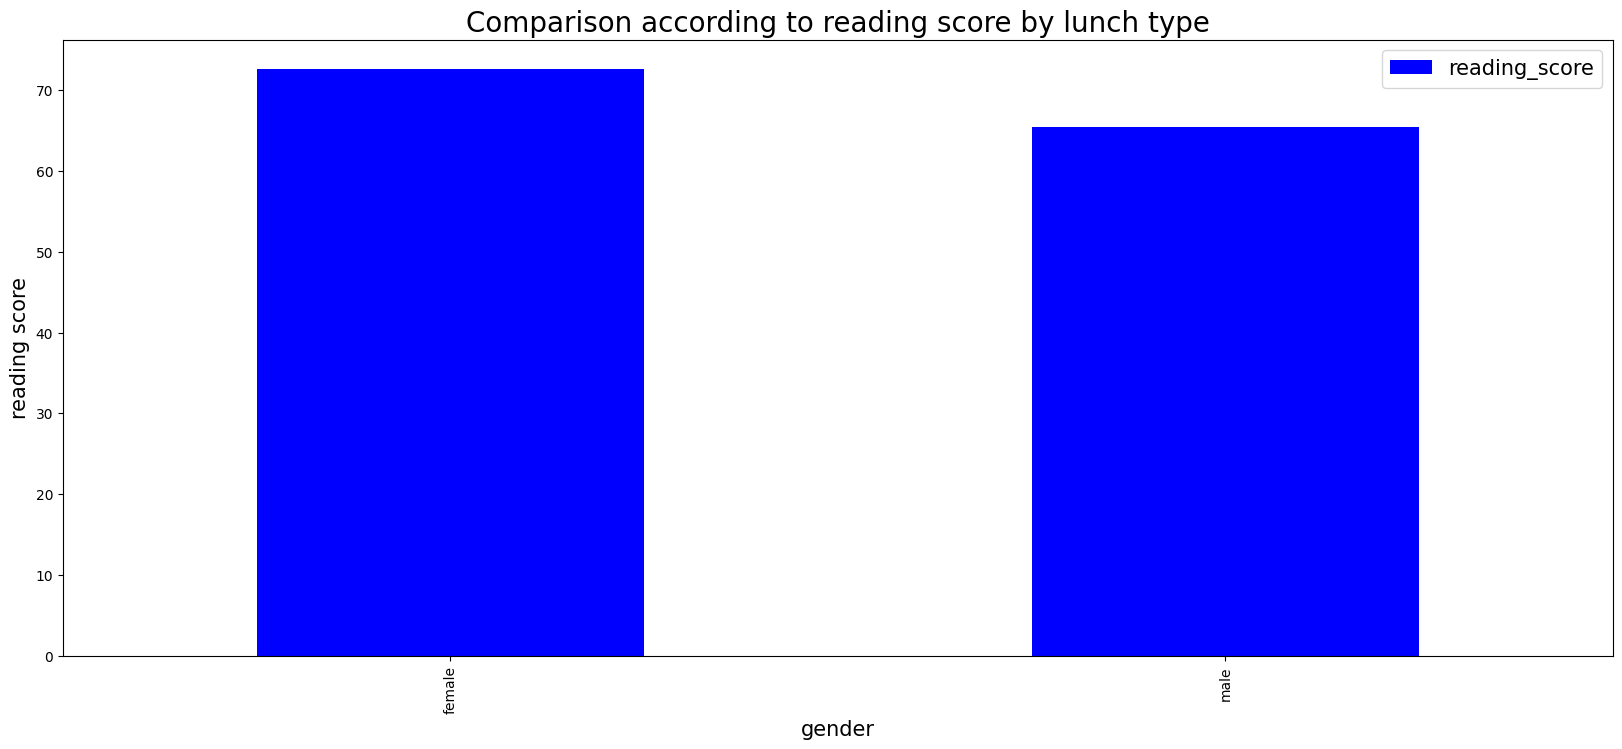

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=[20,8])

df.groupby(['gender'])['reading_score'].mean().plot(kind = 'bar' , color = 'blue')

plt.legend(fontsize = 15);

plt.title("Comparison according to reading score by lunch type",fontdict={'size':'20'});

plt.xlabel('gender',fontdict={'size':'15'});

plt.ylabel('reading score',fontdict={'size':'15'});

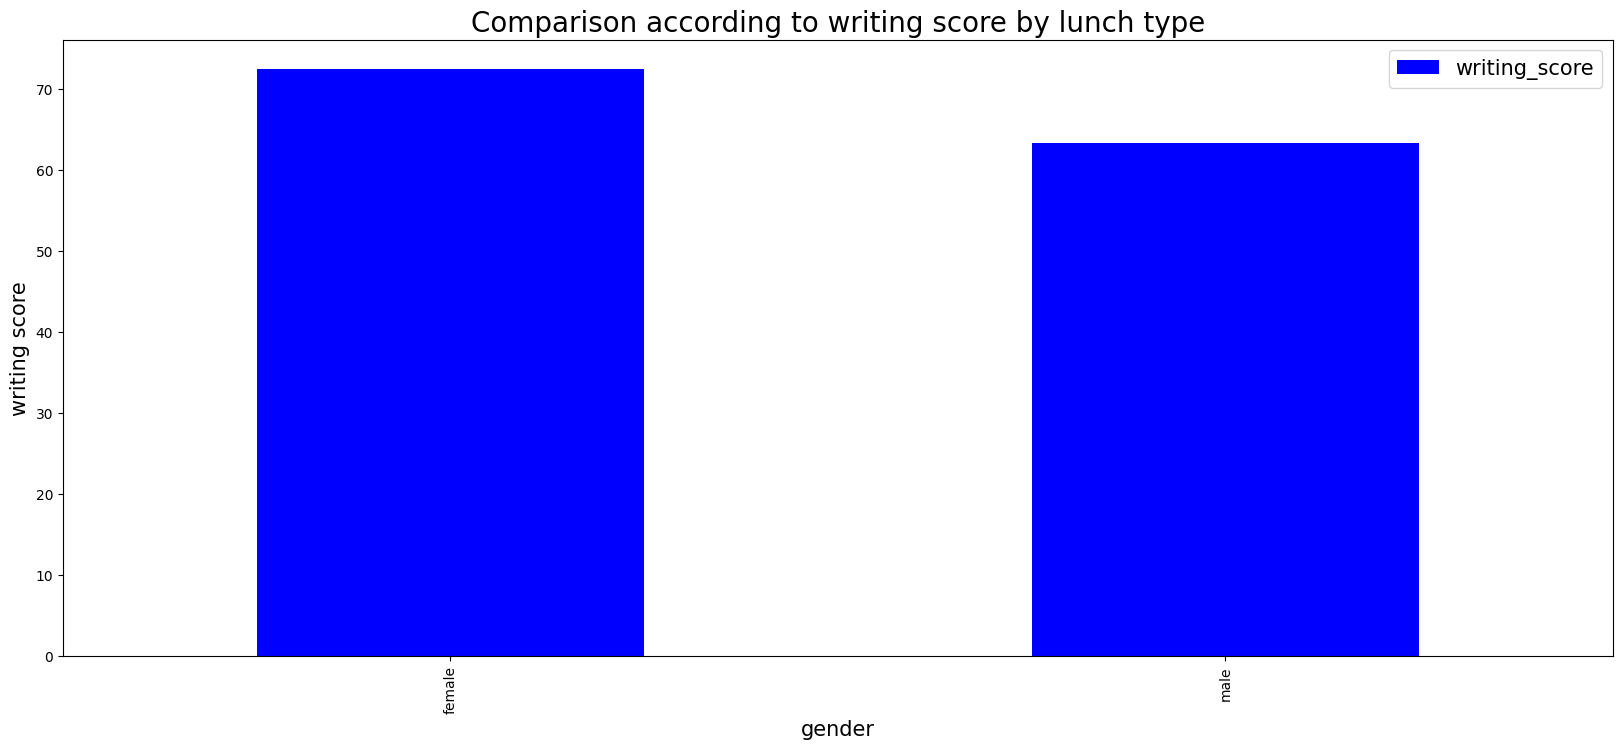

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=[20,8])

df.groupby(['gender'])['writing_score'].mean().plot(kind = 'bar' , color = 'blue')

plt.legend(fontsize = 15);

plt.title("Comparison according to writing score by lunch type",fontdict={'size':'20'});

plt.xlabel('gender',fontdict={'size':'15'});

plt.ylabel('writing score',fontdict={'size':'15'});

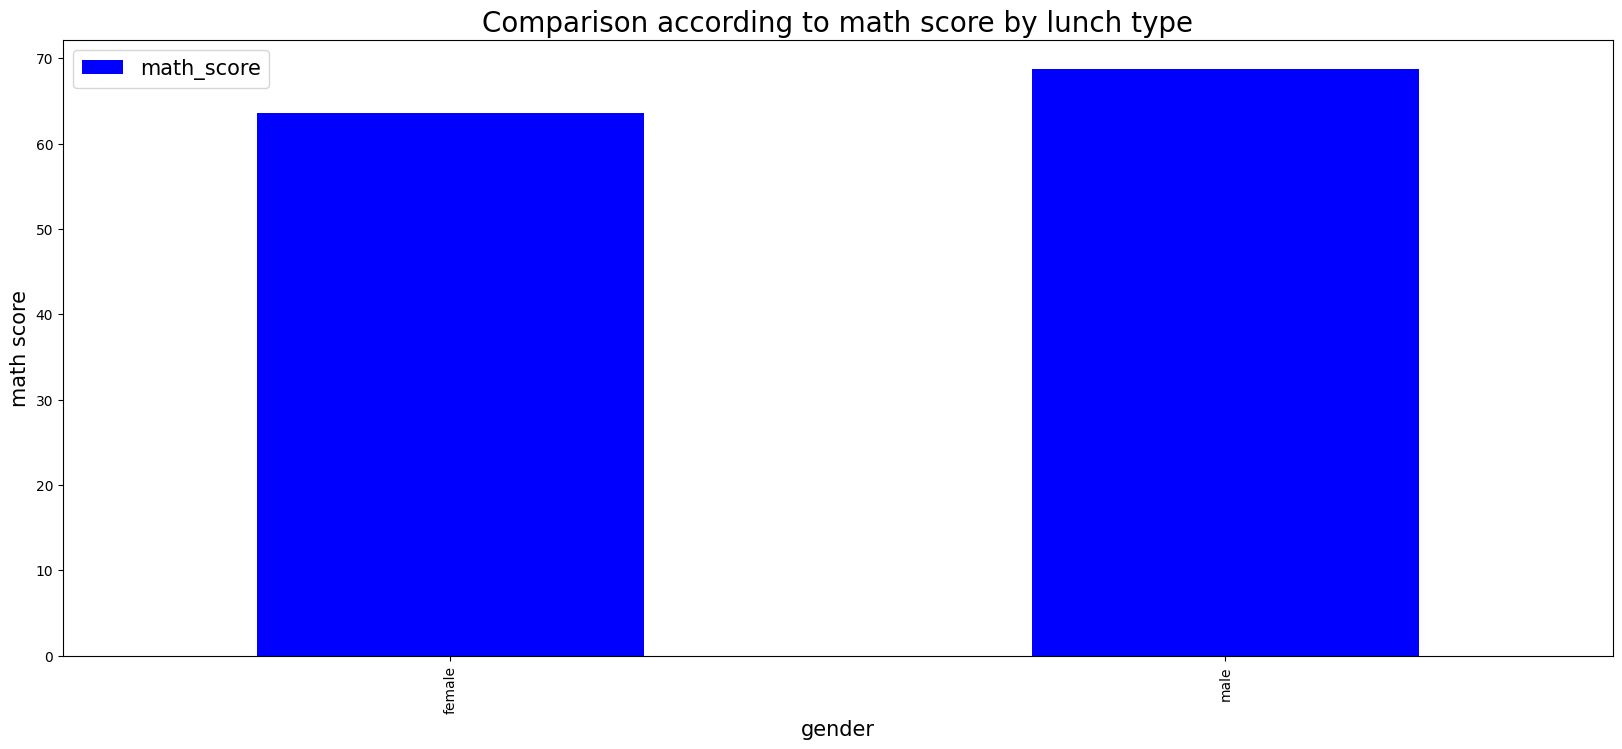

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=[20,8])

df.groupby(['gender'])['math_score'].mean().plot(kind = 'bar',color = 'blue')

plt.legend(fontsize = 15);

plt.title("Comparison according to math score by lunch type",fontdict={'size':'20'});

plt.xlabel('gender',fontdict={'size':'15'});

plt.ylabel('math score',fontdict={'size':'15'});

In [20]:
df[df['total_score'] == 100]

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
458,female,group E,bachelor's degree,standard,none,100,100,100,100.0
916,male,group E,bachelor's degree,standard,completed,100,100,100,100.0
962,female,group E,associate's degree,standard,none,100,100,100,100.0


In [21]:
df[df['total_score'] < 50 ].count()

gender                         103
race/ethnicity                 103
parental_level_of_education    103
lunch                          103
test_preparation_course        103
math_score                     103
reading_score                  103
writing_score                  103
total_score                    103
dtype: int64

In [22]:
df[df['writing_score'] < 50 ].count()

gender                         114
race/ethnicity                 114
parental_level_of_education    114
lunch                          114
test_preparation_course        114
math_score                     114
reading_score                  114
writing_score                  114
total_score                    114
dtype: int64

In [23]:
df[df['reading_score'] < 50 ].count()

gender                         90
race/ethnicity                 90
parental_level_of_education    90
lunch                          90
test_preparation_course        90
math_score                     90
reading_score                  90
writing_score                  90
total_score                    90
dtype: int64

In [24]:
df[df['math_score'] < 50 ].count()

gender                         135
race/ethnicity                 135
parental_level_of_education    135
lunch                          135
test_preparation_course        135
math_score                     135
reading_score                  135
writing_score                  135
total_score                    135
dtype: int64

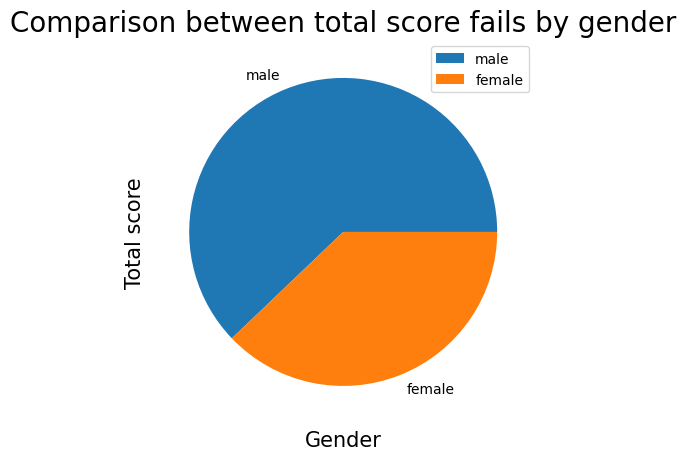

In [25]:
plt.figure(figsize=[15,5])

df['gender'][df['total_score'] < 50].value_counts().plot(kind = 'pie')

plt.legend(fontsize = 10);

plt.title("Comparison between total score fails by gender",fontdict={'size':'20'});

plt.xlabel('Gender',fontdict={'size':'15'});

plt.ylabel('Total score',fontdict={'size':'15'});

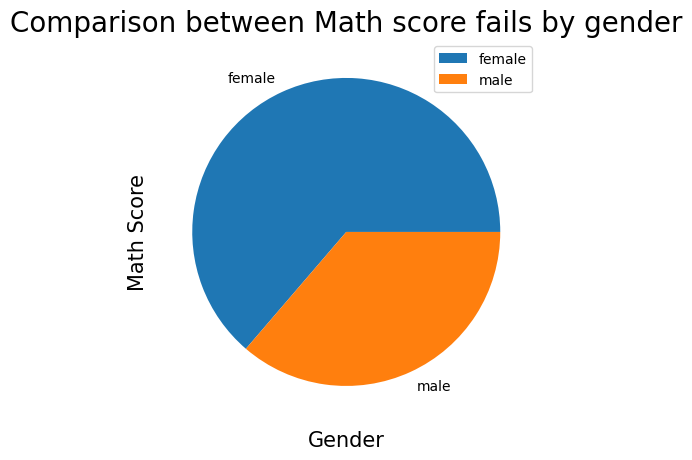

In [26]:
plt.figure(figsize=[15,5])

df['gender'][df['math_score'] < 50].value_counts(normalize = True).plot(kind = 'pie',label = 'noShow')

plt.legend(fontsize = 10);

plt.title("Comparison between Math score fails by gender",fontdict={'size':'20'});

plt.xlabel('Gender',fontdict={'size':'15'});

plt.ylabel('Math Score',fontdict={'size':'15'});

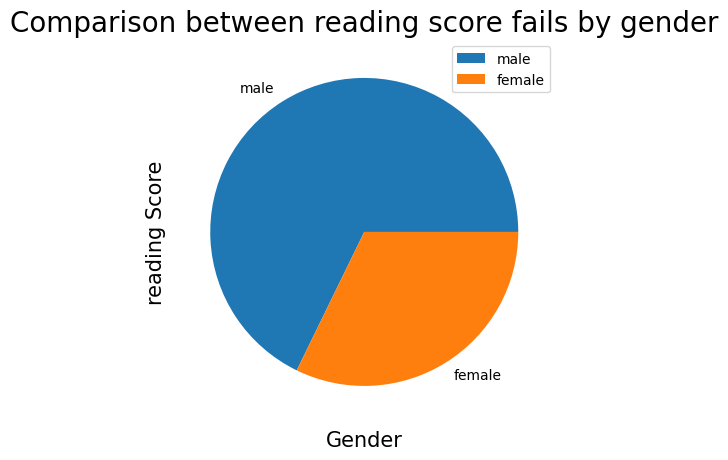

In [27]:
plt.figure(figsize=[15,5])

df['gender'][df['reading_score'] < 50].value_counts(normalize = True).plot(kind = 'pie',label = 'noShow')

plt.legend(fontsize = 10);

plt.title("Comparison between reading score fails by gender",fontdict={'size':'20'});

plt.xlabel('Gender',fontdict={'size':'15'});

plt.ylabel('reading Score',fontdict={'size':'15'});

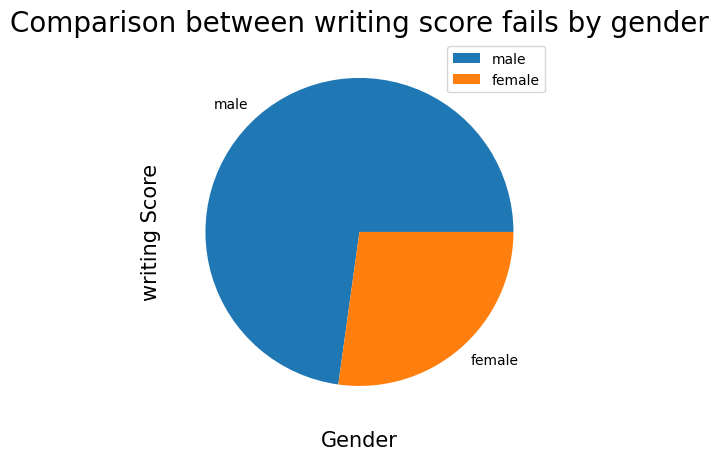

In [28]:
plt.figure(figsize=[15,5])

df['gender'][df['writing_score'] < 50].value_counts(normalize = True).plot(kind = 'pie',label = 'noShow')

plt.legend(fontsize = 10);

plt.title("Comparison between writing score fails by gender",fontdict={'size':'20'});

plt.xlabel('Gender',fontdict={'size':'15'});

plt.ylabel('writing Score',fontdict={'size':'15'});

**We can see that femals are not as good as males in maths but they are good at reading and writing than males, and the total score of females is bigger than total score of males.**

**we can see that there is no correlation between the scores and the type of the group, but group E is the best group according to scores.**

**we can see that there is no coreelation between the scores and the parental level of education, but parents whom have master degree their students score highest scores.**

**we can see that there is no coreelation between the scores and lunch type, but Standard lunch is bigger than free lunch.**

**we can see that there is no coreelation between the scores and the prepartion test so we should try to update the preparation test to help students.**

**there are only 3 students who got 0% percentage so we maybe try to reach them and check with there parents.**

**number of students who fail is 103 so we have to improve our academic system and contact these students to take feedback.**